# Arvore de decisão - Classificação
#### Utilizando a Biblioteca sklearn
#### Pacote de Modelagem - DecisionTreeClassifier

In [20]:
# Pacotes de Manipulação de Dados
import pandas as pd
import numpy as np
# Pacotes Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# Pacotes de modelagem
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Módulo de Análise Exploratória - análise IV (Information Value)
import aed

In [21]:
df= pd.read_csv('base_rh.csv')
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [22]:
df.describe().round(1)


,Idade,Tempo_de_empresa
count,1470.0,1470.0
mean,36.9,7.0
std,9.1,6.1
min,18.0,0.0
25%,30.0,3.0
50%,36.0,5.0
75%,43.0,9.0
max,60.0,40.0


In [23]:
df.describe(include='object')

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida
count,1470,1470,1470,1470,1470,1470
unique,2,3,5,3,2,4
top,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom
freq,1233,1043,572,673,1054,893


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


In [25]:
df.isnull().sum()

,0
Funcionario_Deixou_Empresa,0
Freq_Viagens,0
Formacao,0
Estado_Civil,0
Faz_hora_extras,0
Equilibrio_de_Vida,0
Idade,0
Tempo_de_empresa,0


In [26]:
print(df.duplicated().sum())

33


In [27]:
df.count()

,0
Funcionario_Deixou_Empresa,1470
Freq_Viagens,1470
Formacao,1470
Estado_Civil,1470
Faz_hora_extras,1470
Equilibrio_de_Vida,1470
Idade,1470
Tempo_de_empresa,1470


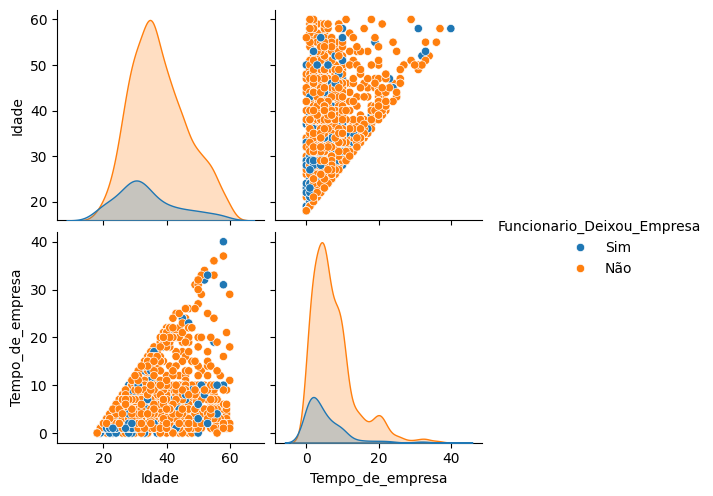

In [28]:
# Matriz de Gráficos
sns.pairplot(df, hue='Funcionario_Deixou_Empresa');


In [29]:
# Análise I.V - Information Value
df['Target'] = np.where(df['Funcionario_Deixou_Empresa'] == 'Sim', 1, 0)
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Target
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0


In [30]:
df_rh_iv = aed.analise_iv(df, 'Target')
df_rh_iv.get_lista_iv()

/content/aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


# Desenvolvimento do model: Árvores de Decisão
## biblioteca mais utilizada é a Scikit Learn

In [31]:
# Definição Target e das Features

# Criação das variaveis dummies
df_rh_modelo = pd.get_dummies(df)
df_rh_modelo.head()

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False


In [32]:
# target (variável resposta)
y = df_rh_modelo['Target']
# Features (Variáveis Explicativas)
x = df_rh_modelo.drop(['Target','Funcionario_Deixou_Empresa_Não', 'Funcionario_Deixou_Empresa_Sim'], axis=1)

In [33]:
# Divisão da Base entre treino e teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Treinamento da Árvore de Decisão
modelo_turnover = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_turnover.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

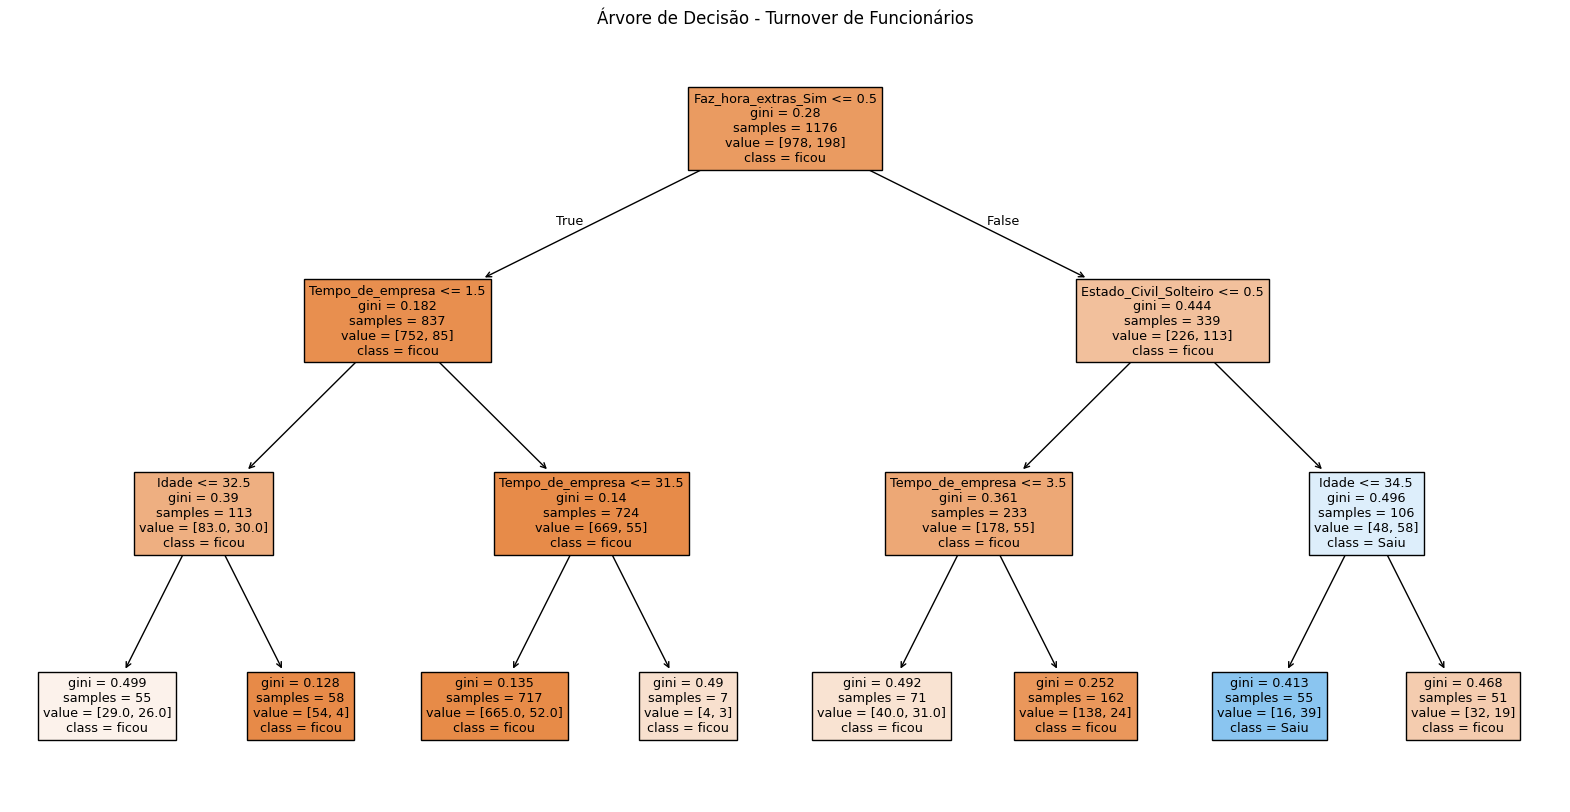

In [35]:
plt.figure(figsize=(20,10))
plot_tree(modelo_turnover, feature_names=x.columns,
          class_names=['ficou', 'Saiu'], filled=True)
plt.title('Árvore de Decisão - Turnover de Funcionários')
plt.show()

In [36]:
# Avaliação de Modelo
y_pred = modelo_turnover.predict(x_test)
print("Acurácia:",accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8639455782312925
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       255
           1       0.46      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.67      0.56      0.58       294
weighted avg       0.83      0.86      0.83       294



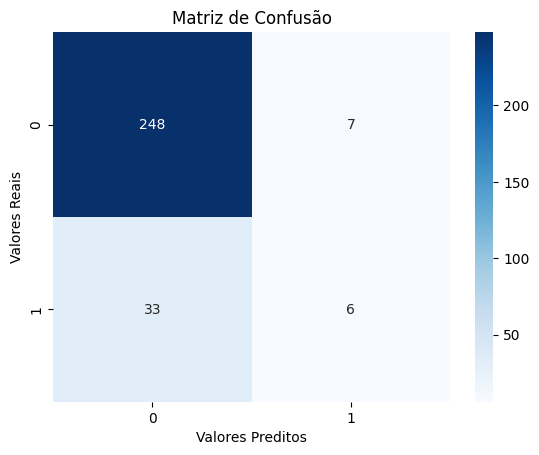

In [39]:
# Matrix de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()